In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import statsmodels.api as sm
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix,mean_squared_log_error,recall_score
import cv2
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [97]:
train=pd.read_csv('/content/drive/My Drive/hacked/Dataset/Train.csv')
test=pd.read_csv('/content/drive/My Drive/hacked/Dataset/Test.csv')
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [99]:
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


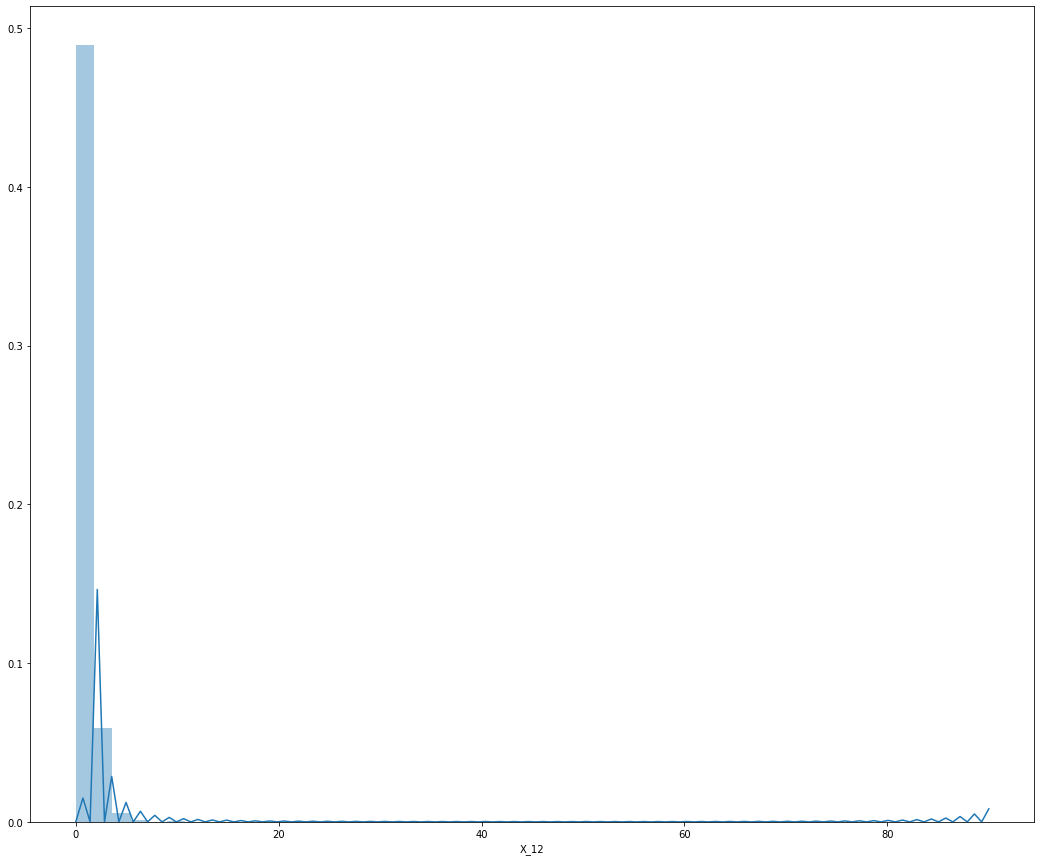

In [100]:
sns.distplot(train['X_12'])
plt.show()

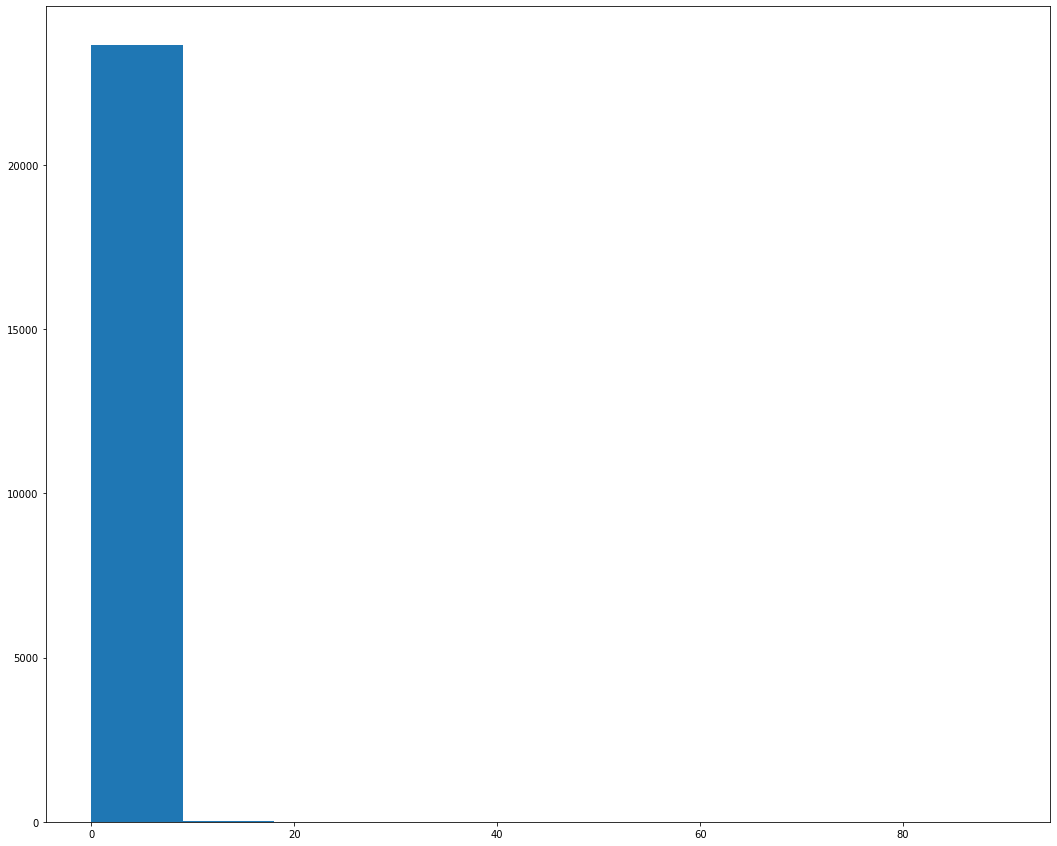

In [101]:
plt.hist(train['X_12'])
plt.show()

In [102]:
a=train['X_12'].value_counts()
print(a)

1.0     15674
0.0      5171
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
8.0         9
10.0        7
9.0         6
7.0         4
11.0        4
15.0        2
20.0        2
17.0        1
58.0        1
50.0        1
40.0        1
16.0        1
90.0        1
12.0        1
30.0        1
14.0        1
Name: X_12, dtype: int64


In [8]:
train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [0]:
train.loc[train['X_12'].isnull(),'X_12']=1.0

In [104]:
train.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

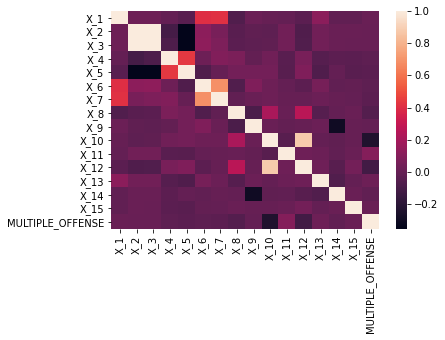

In [29]:
sns.heatmap(train.corr())
plt.show()

In [11]:
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974262,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.163264,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [12]:
train.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

3.877277855305385
-0.08244693855535513
-0.07138799719760716
0.17424783917694323
0.1658278344762283
0.9705192756858894
0.8089045154910406
18.107056933325154
-1.5244190379256675
36.052336312222785
-0.9148361796864851
30.967440379137514
-1.3775281328837854
0.25045008177236316
-2.5769527532746275


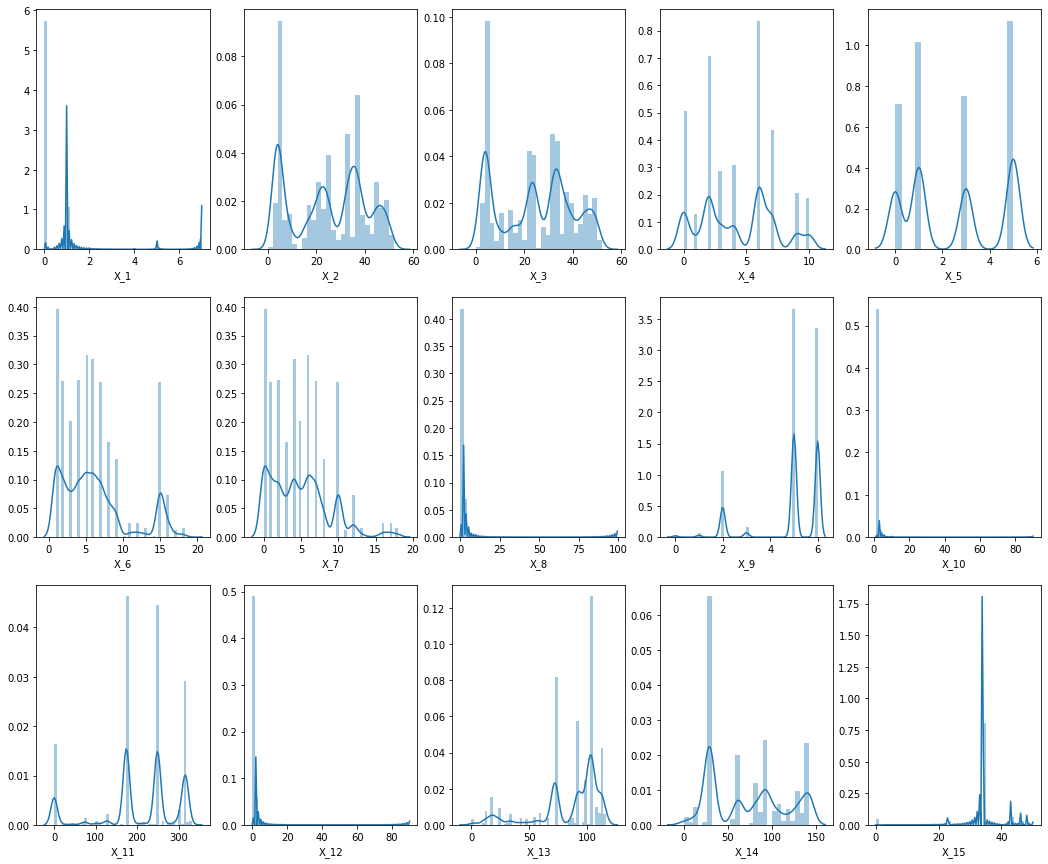

In [44]:
plt.rcParams['figure.figsize']=18,15
columns=train.columns
for i in range(2,17):
  plt.subplot(3,5,i-1)
  print(train[columns[i]].skew())
  sns.distplot(train[columns[i]])
plt.show()  

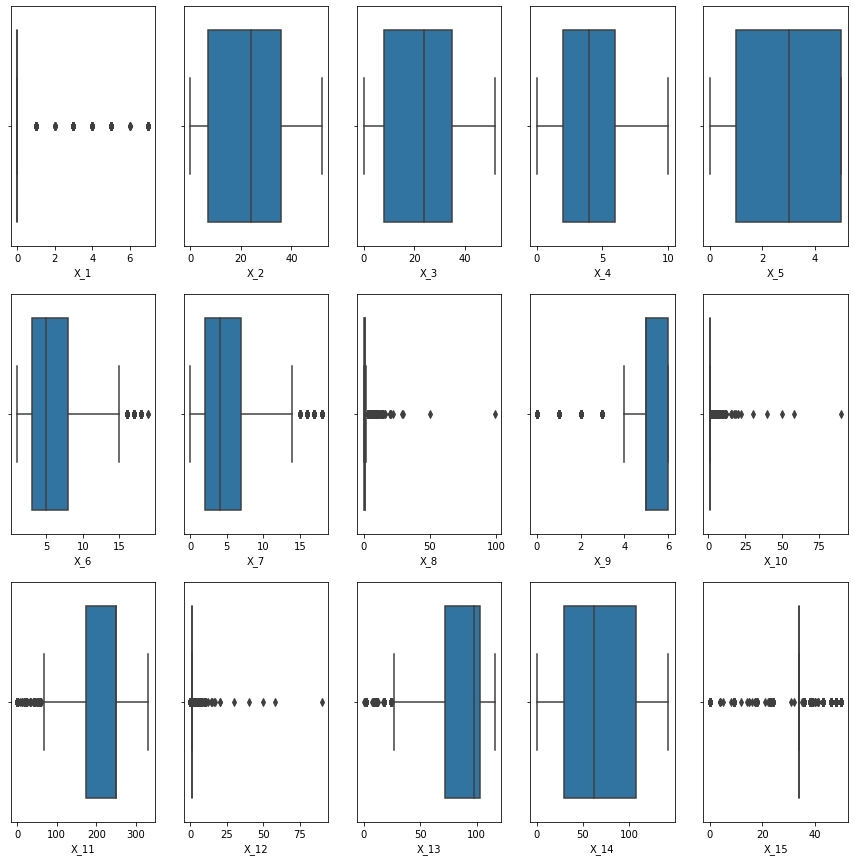

In [15]:
plt.rcParams['figure.figsize']=15,15
columns=train.columns
for i in range(2,17):
  plt.subplot(3,5,i-1)
  sns.boxplot(train[columns[i]])
plt.show()  

**X_1,X_8,X_10,X_12,X_15 are the features to look for more trends**

18.107056933325154
0.5030477982492516


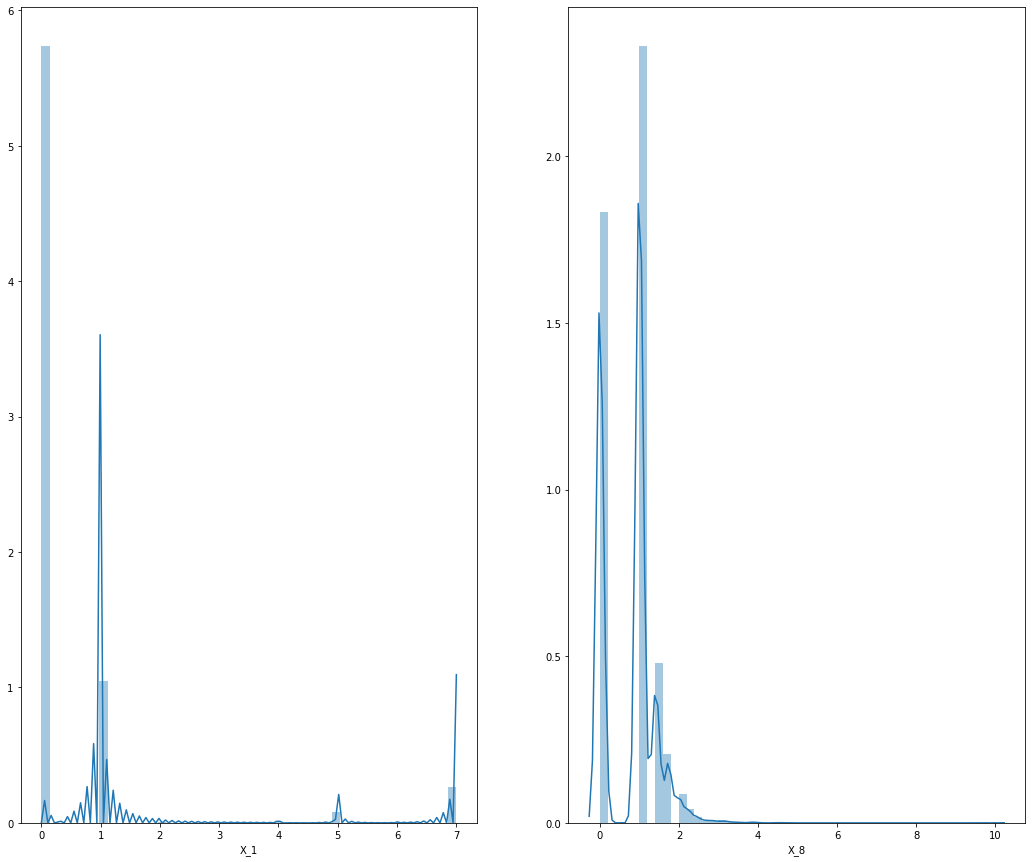

In [46]:
from scipy import stats
x_1_new=np.sqrt(train['X_8'])
plt.subplot(1,2,1)
print(train['X_8'].skew())
sns.distplot(train['X_1'])
plt.subplot(1,2,2)
print(x_1_new.skew())
sns.distplot(x_1_new)
plt.show()

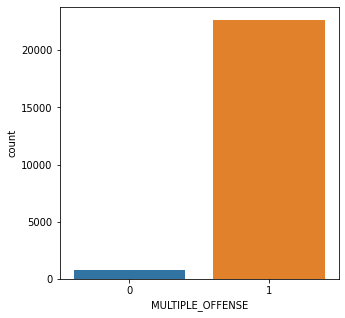

In [40]:
plt.rcParams['figure.figsize']=5,5
sns.countplot(train['MULTIPLE_OFFENSE'])
plt.show()

In [0]:
train_no_hack=train.loc[train['MULTIPLE_OFFENSE']==0,:]
train_hack=train.loc[train['MULTIPLE_OFFENSE']==1,:]
#train_no_hack.to_csv('train_no_hack.csv',index=False)

In [0]:
def comparison(column):
  a=train_no_hack[column].value_counts()
  b=train_hack[column].value_counts()
  return print('no hack:\n',a,'\n','hack:\n',b)

In [35]:
comparison(column='X_1')

no hack:
 0    842
1    189
7     21
5     15
6      1
Name: X_1, dtype: int64 
 hack:
 0    18194
1     3308
7      855
5      255
3      136
4       26
2       10
6        4
Name: X_1, dtype: int64


In [36]:
comparison(column='X_8')

no hack:
 1     409
0     396
2     125
3      67
4      34
5      19
6       5
8       4
11      2
10      2
29      1
20      1
15      1
12      1
7       1
Name: X_8, dtype: int64 
 hack:
 1     10601
0      8378
2      2143
3       900
4       370
5       188
6        74
7        32
8        28
10       21
9        16
15       10
12        7
11        6
20        3
13        2
14        2
16        2
22        1
30        1
21        1
99        1
50        1
Name: X_8, dtype: int64


In [37]:
comparison(column='X_10')

no hack:
 2     702
3     106
1     105
4      84
6      28
5      19
8       9
10      4
9       3
7       3
22      1
18      1
16      1
15      1
12      1
Name: X_10, dtype: int64 
 hack:
 1     20093
2      1993
3       443
4       141
5        52
6        26
10       10
8         6
7         4
9         4
11        4
20        2
12        2
40        1
30        1
58        1
90        1
19        1
50        1
17        1
15        1
Name: X_10, dtype: int64


In [38]:
comparison(column='X_12')

no hack:
 1.0     547
2.0     272
0.0     114
3.0      57
4.0      44
6.0      11
5.0      10
10.0      4
8.0       4
9.0       2
15.0      1
14.0      1
16.0      1
Name: X_12, dtype: int64 
 hack:
 1.0     15309
0.0      5057
2.0      1767
3.0       419
4.0       132
5.0        49
6.0        25
8.0         5
11.0        4
7.0         4
9.0         4
10.0        3
20.0        2
17.0        1
58.0        1
50.0        1
40.0        1
15.0        1
90.0        1
30.0        1
12.0        1
Name: X_12, dtype: int64


In [39]:
comparison(column='X_15')

no hack:
 34    620
36    182
9      92
39     54
46     23
0      20
38     20
24     20
48      7
40      6
17      4
4       4
15      2
43      2
23      2
32      1
31      1
35      1
22      1
21      1
16      1
14      1
12      1
8       1
5       1
Name: X_15, dtype: int64 
 hack:
 34    18327
43     1501
0       997
46      645
23      640
48      514
50      145
18       13
41        6
Name: X_15, dtype: int64


**this shows that if X_15=36,9,39 then it is definitely 0 and if X_15=43 then it is definitely 1**
**If X_1=3 then it is 1**

In [49]:
print(test['X_1'].value_counts(),'\n',test['X_15'].value_counts())

0    12778
1     2264
7      550
5      188
3       92
4       22
2        7
6        2
Name: X_1, dtype: int64 
 34    12699
43     1001
0       663
23      421
46      411
48      343
36      125
9        78
50       72
39       28
38       17
24       10
18        7
41        6
40        4
5         3
35        3
17        1
16        1
1         1
47        1
25        1
33        1
2         1
3         1
11        1
14        1
15        1
42        1
Name: X_15, dtype: int64


In [48]:
new=test.loc[test['X_1']==3,:]
new1=new.loc[test['X_15']==9,:]
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  0 non-null      object 
 1   DATE         0 non-null      object 
 2   X_1          0 non-null      int64  
 3   X_2          0 non-null      int64  
 4   X_3          0 non-null      int64  
 5   X_4          0 non-null      int64  
 6   X_5          0 non-null      int64  
 7   X_6          0 non-null      int64  
 8   X_7          0 non-null      int64  
 9   X_8          0 non-null      int64  
 10  X_9          0 non-null      int64  
 11  X_10         0 non-null      int64  
 12  X_11         0 non-null      int64  
 13  X_12         0 non-null      float64
 14  X_13         0 non-null      int64  
 15  X_14         0 non-null      int64  
 16  X_15         0 non-null      int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 0.0+ bytes


**this mean that total of 321 test observatons can easily be predicted without any algorithm**

In [105]:
new1=train.loc[train['X_1']==3,:].index
new2=train.loc[train['X_15']==36,:].index
new3=train.loc[train['X_15']==9,:].index
new4=train.loc[train['X_15']==39,:].index

a=list(new1)
b=list(new2)
c=list(new3)
d=list(new4)

final=[]
for i in a:
  final.append(i)
for i in b:
  final.append(i)
for i in c:
  final.append(i)
for i in d:
  final.append(i)



print(len(final))

464


In [0]:
train=train.drop(final,axis=0)

In [0]:
y=train['MULTIPLE_OFFENSE']
x=train.drop(['MULTIPLE_OFFENSE','INCIDENT_ID','DATE','X_2'],axis=1)
columns=x.columns
for i in columns:
  if x[i].skew()>=1:
    x[i]=np.sqrt(x[i])
#to remove skewness
#sm=over_sampling.SMOTE(sampling_strategy=0.5,random_state=100)
#x_new,y_new=sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=100)

In [0]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)


In [128]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(18713, 14) (18713,) (4679, 14) (4679,)


In [129]:
#using Random Forest
rfg=RandomForestClassifier(max_depth=7,n_estimators=500,min_samples_leaf=3,max_features=12,criterion='gini')
rfg.fit(x_train,y_train)
predicted=rfg.predict(x_test)
print(recall_score(y_test,predicted),confusion_matrix(y_test,predicted),accuracy_score(y_test,predicted))

0.9993378945045244 [[ 138   10]
 [   3 4528]] 0.9972216285531096


In [130]:
#using xgboost 
eval_set=[(x_test,y_test)]
xgb=XGBClassifier(learning_rate=0.03,max_depth=5,n_estimators=200,min_child_weight=3,colsample_bytree=0.8,reg_lambda=1,gamma=2,objective='reg:logistic',seed=42)
xgb.fit(x_train,y_train,eval_set=eval_set,early_stopping_rounds=100)
predicted=xgb.predict(x_test)
print(recall_score(y_test,predicted),confusion_matrix(y_test,predicted),accuracy_score(y_test,predicted))


[0]	validation_0-rmse:0.485636
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.471554
[2]	validation_0-rmse:0.458075
[3]	validation_0-rmse:0.444984
[4]	validation_0-rmse:0.432591
[5]	validation_0-rmse:0.419951
[6]	validation_0-rmse:0.407878
[7]	validation_0-rmse:0.396
[8]	validation_0-rmse:0.384808
[9]	validation_0-rmse:0.374196
[10]	validation_0-rmse:0.36353
[11]	validation_0-rmse:0.353189
[12]	validation_0-rmse:0.343556
[13]	validation_0-rmse:0.33385
[14]	validation_0-rmse:0.324433
[15]	validation_0-rmse:0.315689
[16]	validation_0-rmse:0.306838
[17]	validation_0-rmse:0.298388
[18]	validation_0-rmse:0.290092
[19]	validation_0-rmse:0.282052
[20]	validation_0-rmse:0.274276
[21]	validation_0-rmse:0.266748
[22]	validation_0-rmse:0.2592
[23]	validation_0-rmse:0.252052
[24]	validation_0-rmse:0.244962
[25]	validation_0-rmse:0.238325
[26]	validation_0-rmse:0.231823
[27]	validation_0-rmse:0.22536
[28]	validation_0-rmse:0.219344
[29]	validation_0-rmse:0

In [0]:
test=pd.read_csv('/content/drive/My Drive/hacked/Dataset/Test.csv')

In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15903 non-null  object 
 1   DATE         15903 non-null  object 
 2   X_1          15903 non-null  int64  
 3   X_2          15903 non-null  int64  
 4   X_3          15903 non-null  int64  
 5   X_4          15903 non-null  int64  
 6   X_5          15903 non-null  int64  
 7   X_6          15903 non-null  int64  
 8   X_7          15903 non-null  int64  
 9   X_8          15903 non-null  int64  
 10  X_9          15903 non-null  int64  
 11  X_10         15903 non-null  int64  
 12  X_11         15903 non-null  int64  
 13  X_12         15776 non-null  float64
 14  X_13         15903 non-null  int64  
 15  X_14         15903 non-null  int64  
 16  X_15         15903 non-null  int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ MB


In [0]:
test.loc[test['X_12'].isnull(),'X_12']=1.0

In [120]:
test.isnull().sum()

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

In [91]:
new=test.loc[test['X_1']==3,:]
new1=new.loc[test['X_15']==43,:]
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 301 to 15164
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCIDENT_ID  15 non-null     object 
 1   DATE         15 non-null     object 
 2   X_1          15 non-null     int64  
 3   X_2          15 non-null     int64  
 4   X_3          15 non-null     int64  
 5   X_4          15 non-null     int64  
 6   X_5          15 non-null     int64  
 7   X_6          15 non-null     int64  
 8   X_7          15 non-null     int64  
 9   X_8          15 non-null     int64  
 10  X_9          15 non-null     int64  
 11  X_10         15 non-null     int64  
 12  X_11         15 non-null     int64  
 13  X_12         15 non-null     float64
 14  X_13         15 non-null     int64  
 15  X_14         15 non-null     int64  
 16  X_15         15 non-null     int64  
dtypes: float64(1), int64(14), object(2)
memory usage: 2.1+ KB


In [0]:
id1=test['INCIDENT_ID']

In [122]:
test

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,1.0,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15898,CR_44468,28-NOV-97,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43
15899,CR_158460,09-JUN-12,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34
15900,CR_115946,22-APR-06,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34
15901,CR_137663,03-APR-09,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34


In [0]:
test=test.drop(['INCIDENT_ID','DATE','X_2'],axis=1)

In [0]:
columns=test.columns
for i in columns:
  if test[i].skew()>=1:
    test[i]=np.sqrt(test[i])

In [0]:
f=np.random.randint(0,20,14)
test_new=np.array(test)
results=[]
for i in range(test.shape[0]):
  if test['X_1'][i]==3:
    results.append(1)
  elif test['X_15'][i]==36:
    results.append(0)
  elif test['X_15'][i]==9:
    results.append(0) 
  elif test['X_15'][i]==39:
    results.append(0)    
  else:
    a=test_new[i][:]
    test_set=np.row_stack((a,f))
    predict=xgb.predict(test_set)
    results.append(predict[0])

In [132]:
print(len(results))

15903


In [134]:
final_results=pd.DataFrame({'INCIDENT_ID':id1,'MULTIPLE_OFFENSE':results})
final_results.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [0]:
final_results.to_csv('hackerearth1.csv',index=False)